Import libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [2]:
%matplotlib inline
sns.set(style="darkgrid")


Load a raw dataset.


In [3]:
hogwarts_data = pd.read_csv("datasets/dataset_train.csv")


In [4]:
hogwarts_data.Birthday = pd.to_datetime(hogwarts_data.Birthday)

Define the function that calculate the quantile.


In [5]:
def get_quartile(column, q_quartile) -> float:
    # quartile position
    qu_p = q_quartile * .25 * (column.size - 1)
    # quartile index
    qu_i = int(qu_p)
    # quartile position fraction part
    qu_fract = qu_p - int(qu_i)
    quartile = column.iloc[qu_i] * (1 - qu_fract) + column.iloc[qu_i +
                                                                1] * qu_fract
    return quartile

Define describe function.


In [6]:
def describe(df):
    df = df.select_dtypes(include=['int64', 'float64'])
    describe_df = pd.DataFrame(
        index=["Count", "Mean", "Std", "Min", "25%", "50%", "75%", "Max"])
    for column_name in df:
        column = df[column_name][df[column_name].notna()].sort_values()
        mean = column.sum() / column.size
        std = np.sqrt(((column - mean)**2).sum() / (column.size - 1))
        describe_df[column_name] = [
            column.size, mean, std, column.iloc[0],
            get_quartile(column, 1),
            get_quartile(column, 2),
            get_quartile(column, 3), column.iloc[column.size - 1]
        ]
    return describe_df


Visualize histogram.


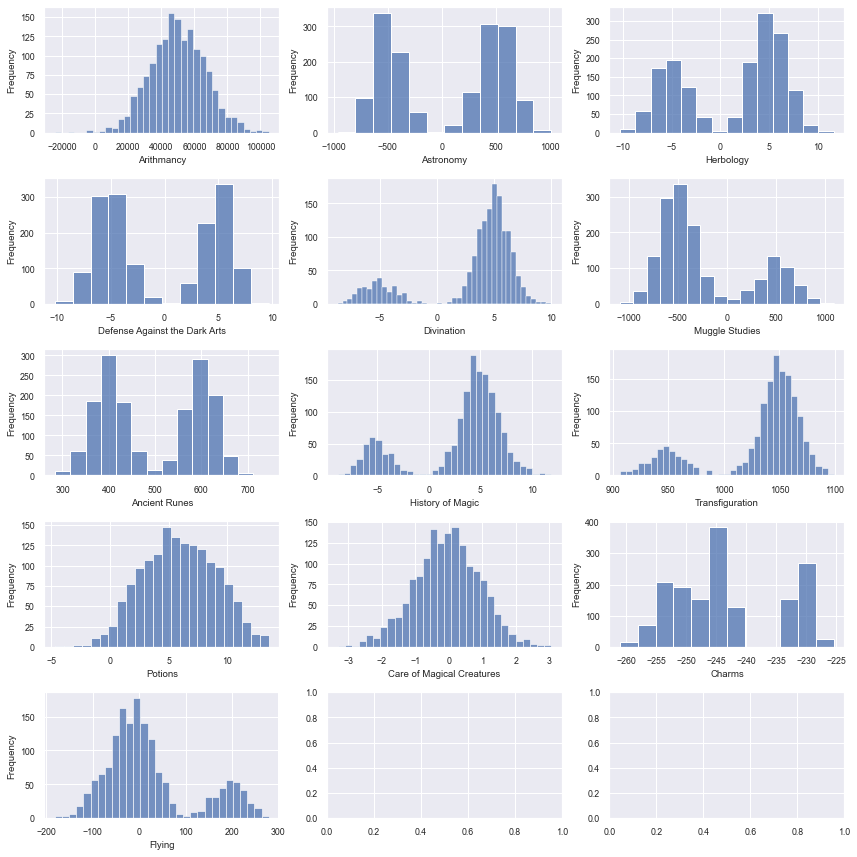

In [7]:
def histogram(df, ncols: int = 3, figsize=(12, 12)):
    sns.set_style("whitegrid")
    sns.set(font_scale=0.8)
    df = df.select_dtypes(include=['float64'])
    fig, axs = plt.subplots(math.ceil(df.shape[1] / ncols),
                            ncols,
                            figsize=figsize)
    x = 0
    y = 0
    for column_name in df:
        p = sns.histplot(data=df, x=column_name, ax=axs[y, x])
        p.set_ylabel("Frequency")
        x += 1
        if x == ncols:
            x = 0
            y += 1
    plt.tight_layout()
    plt.show()


histogram(hogwarts_data)